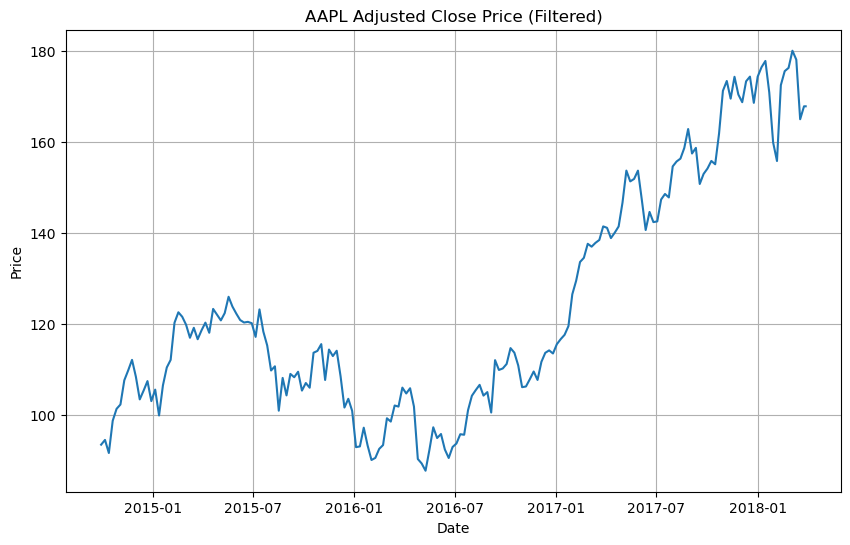

ADF Test Results:
ADF Statistic: -0.08759105267407674
p-value: 0.9506605719318454
Critical Values: {'1%': -3.467845319799907, '5%': -2.878011745497439, '10%': -2.575551186759871}
The series is likely non-stationary (p-value > 0.05).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = "C:\\Users\\Lenovo\\Downloads\\AAPL.csv"
data = pd.read_csv(file_path)

# Ensure column names are clean
data.columns = data.columns.str.strip()

# Convert 'Date' to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check for 'Adj Close' column
if 'Adj Close' not in data.columns:
    raise KeyError("'Adj Close' column not found in the dataset.")

# Access the 'Adj Close' column
price_data = data['Adj Close']

# Handle missing values
price_data.fillna(price_data.mean(), inplace=True)

# Handle outliers using IQR
Q1 = price_data.quantile(0.25)
Q3 = price_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = price_data[(price_data >= lower_bound) & (price_data <= upper_bound)]

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_data)
plt.title('AAPL Adjusted Close Price (Filtered)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Perform ADF Test
result = adfuller(filtered_data)

# Print results
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

# Interpretation
if result[1] <= 0.05:
    print("The series is likely stationary (p-value <= 0.05).")
else:
    print("The series is likely non-stationary (p-value > 0.05).")
